# Final Project Submission

Please fill out:
* Student name: Nopasorn Kowathanakul
* Student pace: Self-paced
* Scheduled project review date: Sep 24, 2021
* Instructor name: Jeff Herman
* Blog post URL: https://knotmirai.com/en/data-science-en/customer-churn-analysis/

In [1]:
#Import tools
#Calculation
import numpy as np
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("talk")

#Machine-learning toolkit
from sklearn.metrics import precision_recall_curve,accuracy_score, confusion_matrix, recall_score
from sklearn.metrics import precision_score, roc_auc_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
import imblearn
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

## 1. Data Preview and Cleaning
* Load and preview data
* Check duplication
* Check missing values

In [2]:
#Importing Data
df = pd.read_csv("bigml_59c28831336c6604c800002a.csv")

#Preview data
print(df.shape)
df.head()

(3333, 21)


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
#Check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### Column Names and Descriptions

* **state** - customer living state
* **account length** - customer usage length
* **area code** - customer area code number
* **phone number** - customer phone number
* **international plan** - customer use international plan or not
* **voice mail plan** - customer use voice mail plan or not
* **number vmail messages** - number of voice mail usage
* **total day minutes** - total day-time call length
* **total day calls** - total number of day-time call
* **total day charge** - total charge for day-time call
* **total eve minutes** - total evening-time call length
* **total eve calls** - total number of evening-time call
* **total eve charge** - total charge for evening-time call
* **total night minutes** - total night-time call length
* **total night calls** - total number of night-time call
* **total night charge** - total charge for night-time call
* **total intl minutes** - total international call length
* **total intl calls** - total number of international call
* **total intl charge** - total charge for internationl call
* **customer service calls** - number of customer call customer service
* **churn** - customer use or stop using service

In [4]:
#Check duplication
df.duplicated().any()

False

In [5]:
#Check missing values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

## 2. Exploratory Data Analysis (EDA)
* Data visualization
* Data selection
* Data Preparation

In [6]:
#Categorize data
cat_cols = ['international plan', 'voice mail plan']
num_cols = df.columns.drop(cat_cols + ['churn'])

Total customer: 3333 people


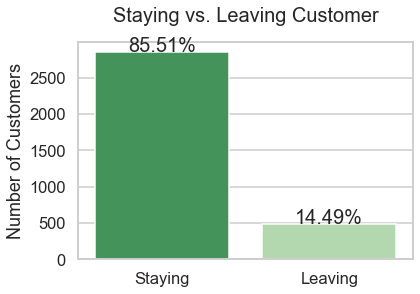

In [7]:
#Observe churn customer
total = int(len(df))
print('Total customer: '+ str(total)+' people')
ax = sns.countplot(x='churn', data=df,  palette="Greens_r")
ax.set(xlabel='',ylabel='Number of Customers')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+3, '{:1.2f}'.format((height/total*100))+ '%',
            ha="center",fontsize=20) 
ax.set_xticklabels(("Staying","Leaving"))    
plt.title(("Staying vs. Leaving Customer"), fontsize = 20, pad = 20);

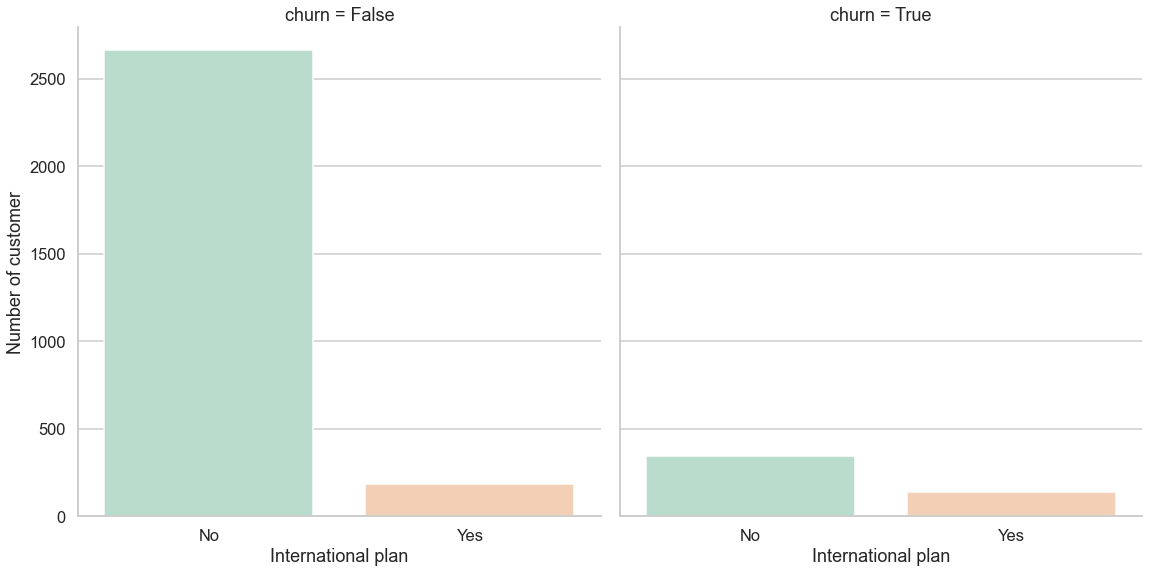

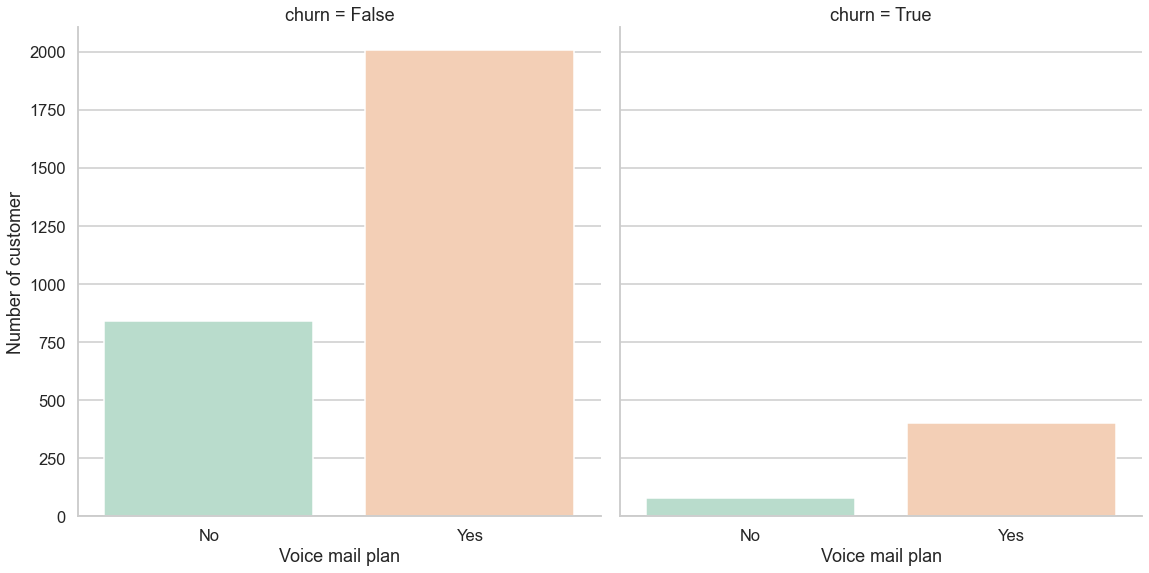

In [8]:
#Churn customer vs. usage plan
def print_cat(df, col):
    '''
    Prints the categorical plot of the count values of churn customers with another input variable.
    
    Parameters
    ----------
    df - DataFrame
    col - names of variables in ``df``
    
    '''
    g = sns.catplot(x=col, col='churn', data=df, kind="count", height=8, palette = sns.color_palette("Pastel2",8))
    g.set_axis_labels(col.capitalize(), "Number of customer")
    g.set_xticklabels(["No", "Yes"])

for i in cat_cols:
    print_cat(df,i)

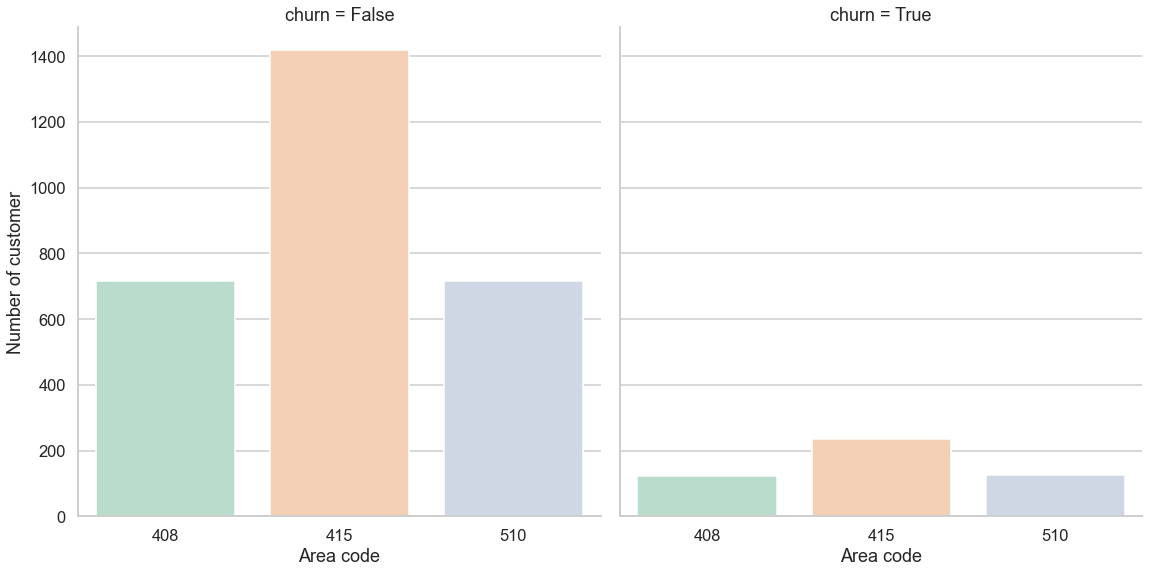

In [9]:
#Churn customers vs. area
g = sns.catplot(x='area code', col='churn', data=df, kind="count", height=8, palette = sns.color_palette("Pastel2",8))
g.set_axis_labels('Area code', "Number of customer");


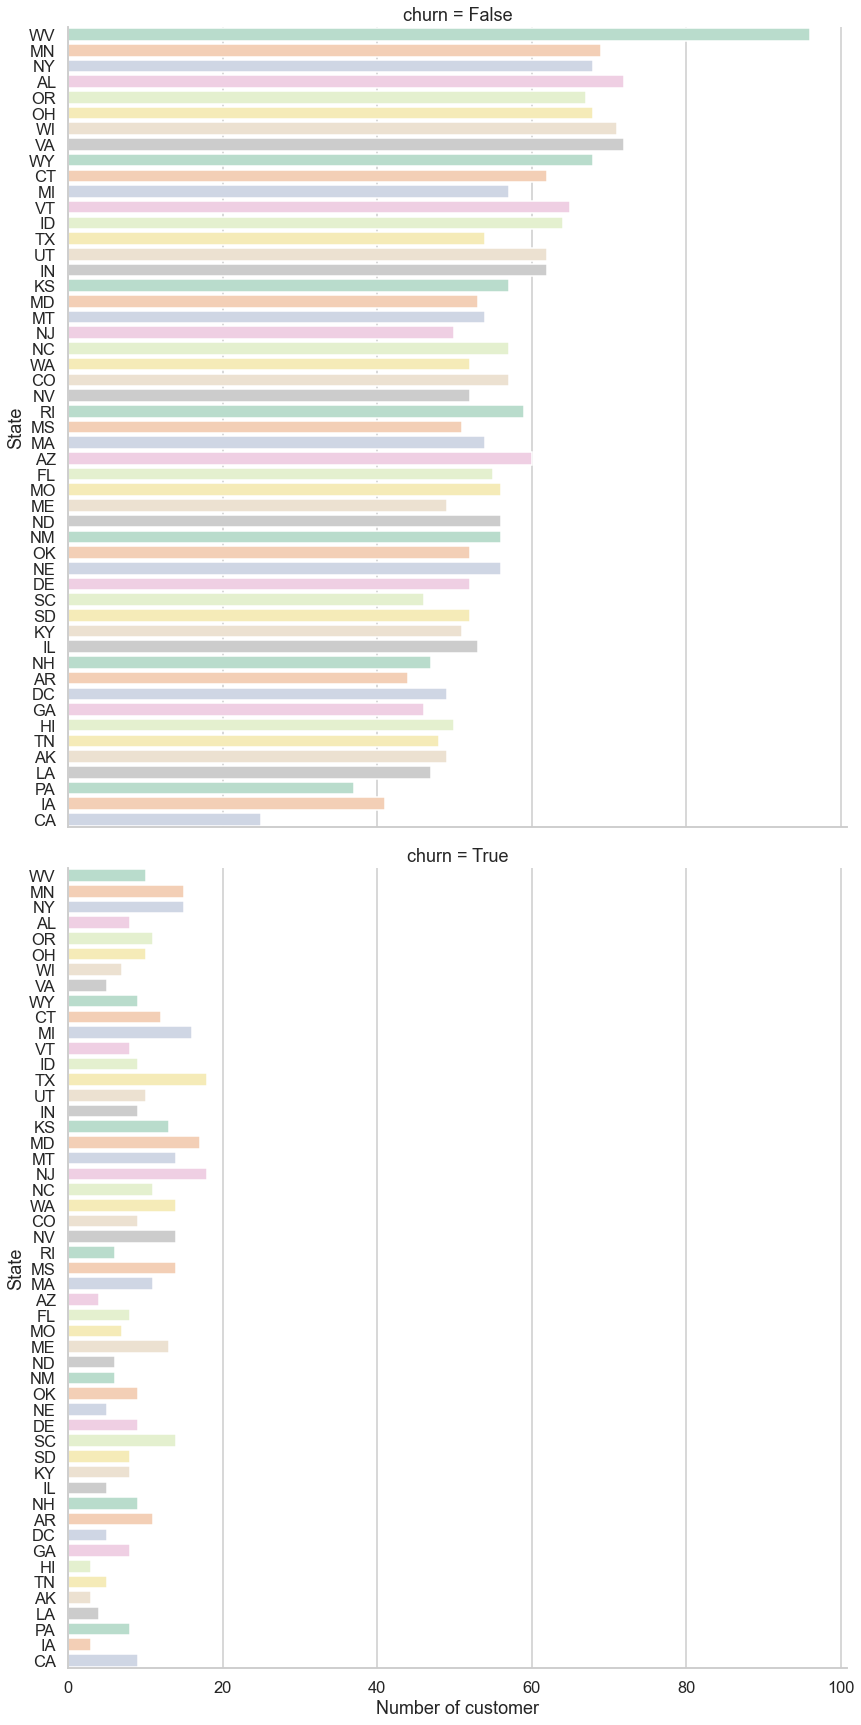

In [10]:
g = sns.catplot(y='state', row='churn', data=df, kind="count", height=12, 
                palette = sns.color_palette("Pastel2",8), orient='h', 
                order=df['state'].value_counts().index)
g.set_axis_labels("Number of customer",'State');

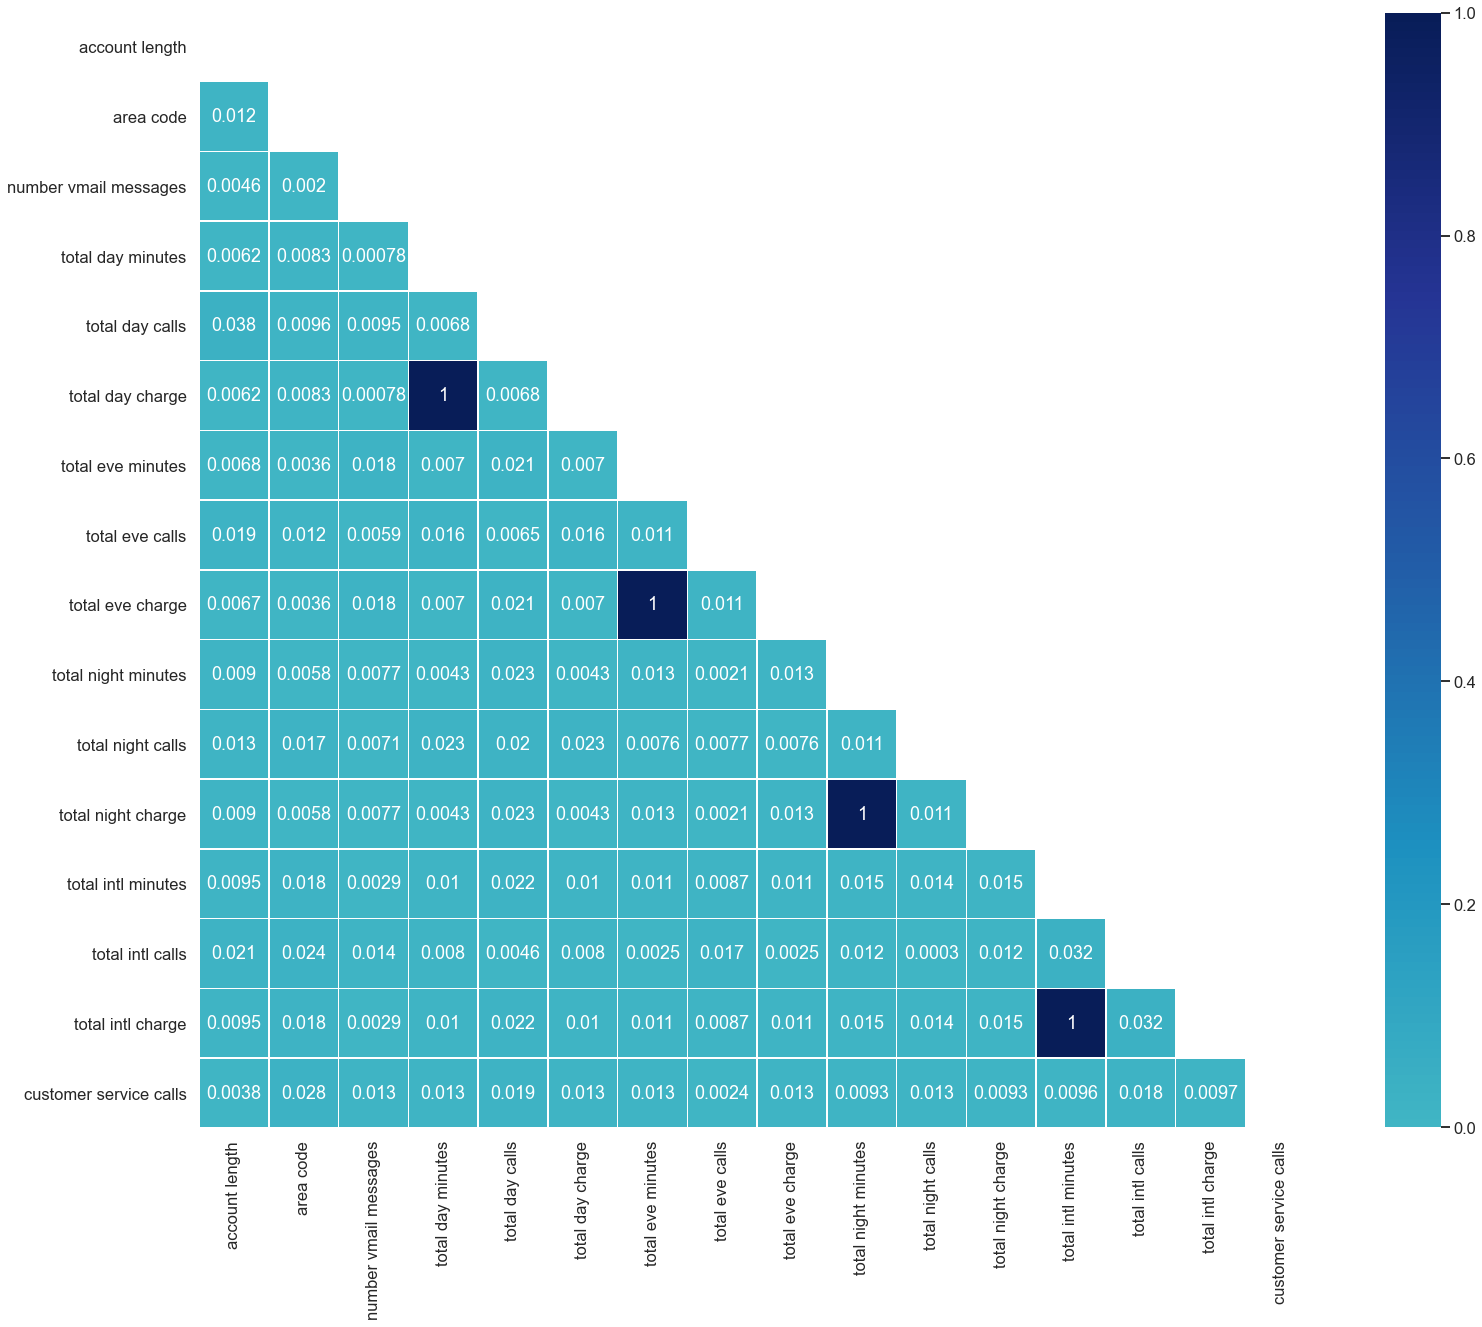

In [11]:
#Check correlation for numerical data
mask = np.zeros_like(df[num_cols].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(25,25))
sns.heatmap(abs(df[num_cols].corr()), linewidths=.5, vmin=0, vmax=1, cbar_kws={'shrink': .82}, 
            annot=True, cmap='YlGnBu', center=0, mask=mask, square=True);

In [12]:
df_dummy=df.drop(cat_cols+['churn', 'area code', 'state', 'phone number'], axis=1)
df_dummy.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


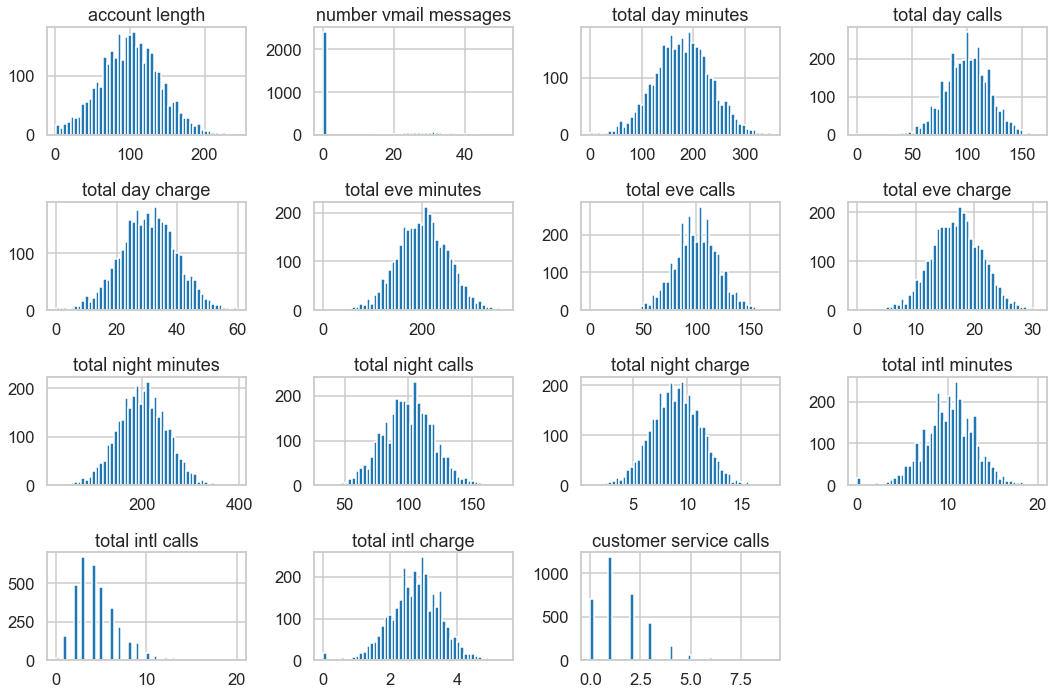

In [13]:
fig = df_dummy.hist(bins=50, figsize=(15,10), grid=True)
plt.tight_layout();

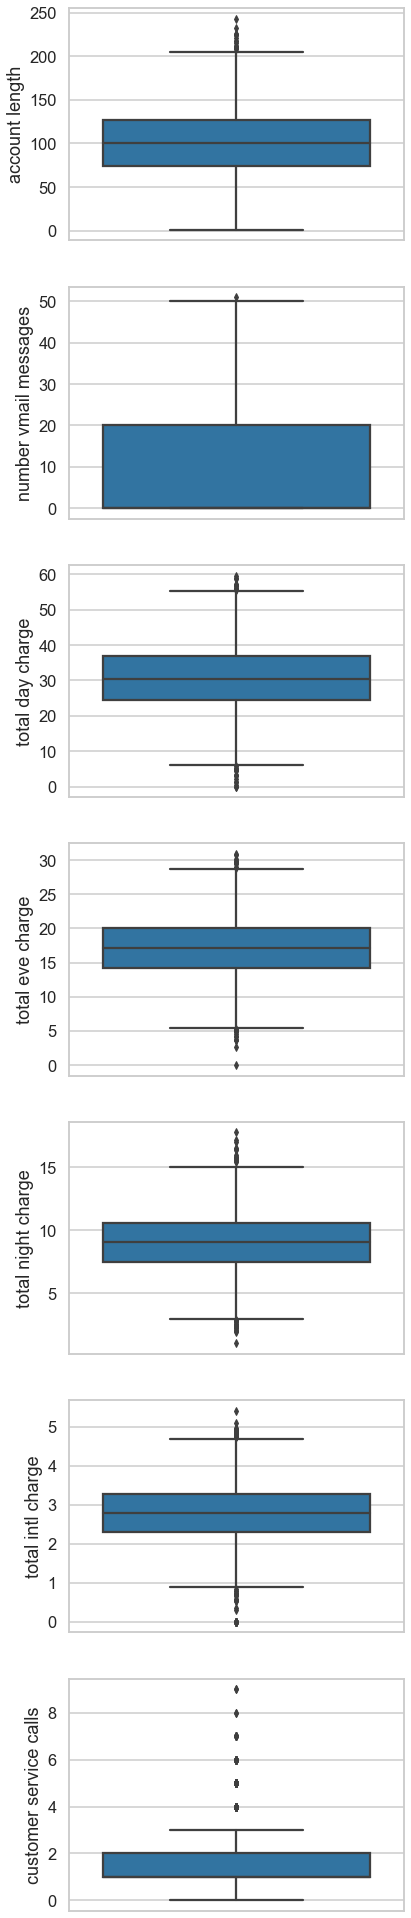

In [14]:
#Check outliner
features = ['account length', 'number vmail messages', 'total day charge',
            'total eve charge', 'total night charge', 'total intl charge', 'customer service calls']

n=len(features)

fig,ax = plt.subplots(n,1, figsize=(6,n*5), sharex=True)
m= 0

for i in features:
    plt.sca(ax[m])
    sns.boxplot(y=i , data=df_dummy);
    m+=1

In [15]:
#Remove outliner
df = df.loc[df['account length']<=205]
df = df.loc[df['number vmail messages']<=50]
df = df[(df['total day charge'] >= 6) & (df['total day charge'] <= 55)]
df = df[(df['total eve charge'] >=7) & (df['total eve charge'] <= 27)]
df = df[(df['total night charge'] >=3) & (df['total night charge'] <= 15)]
df = df[(df['total intl charge'] >=1) & (df['total intl charge'] <= 4.5)]
df = df[(df['customer service calls'] <=4)]

In [16]:
df = df.drop(['phone number','total day minutes', 'total eve minutes', 'total night minutes','total intl minutes'], axis=1)
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,110,45.07,99,16.78,91,11.01,3,2.70,1,False
1,OH,107,415,no,yes,26,123,27.47,103,16.62,103,11.45,3,3.70,1,False
2,NJ,137,415,no,no,0,114,41.38,110,10.30,104,7.32,5,3.29,0,False
4,OK,75,415,yes,no,0,113,28.34,122,12.61,121,8.41,3,2.73,3,False
5,AL,118,510,yes,no,0,98,37.98,101,18.75,118,9.18,6,1.70,0,False


In [17]:
#Change columns name
df.columns = df.columns.str.strip().str.replace(' ', '_')
df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_calls',
       'total_day_charge', 'total_eve_calls', 'total_eve_charge',
       'total_night_calls', 'total_night_charge', 'total_intl_calls',
       'total_intl_charge', 'customer_service_calls', 'churn'],
      dtype='object')

In [18]:
df["churn"]=df.churn.replace("True","1").replace("False","0").astype(int)

df = pd.get_dummies(df, columns=['state', 'area_code', 'international_plan','voice_mail_plan'], drop_first=True)
df.head()

,account_length,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_415,area_code_510,international_plan_yes,voice_mail_plan_yes
0,128,25,110,45.07,99,16.78,91,11.01,3,2.70,...,0,0,0,0,0,0,1,0,0,1
1,107,26,123,27.47,103,16.62,103,11.45,3,3.70,...,0,0,0,0,0,0,1,0,0,1
2,137,0,114,41.38,110,10.30,104,7.32,5,3.29,...,0,0,0,0,0,0,1,0,0,0
4,75,0,113,28.34,122,12.61,121,8.41,3,2.73,...,0,0,0,0,0,0,1,0,1,0
5,118,0,98,37.98,101,18.75,118,9.18,6,1.70,...,0,0,0,0,0,0,0,1,1,0


## 3. Modeling
* Logistic Regression
* SMOTE
* Decision Tree
* GridSearchCV
* Random Forest

In [19]:
#Normalization
for column in df.columns:
    df[column] = (df[column] - min(df[column])) / (max(df[column]) - min(df[column])) 

df.head()

,account_length,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_415,area_code_510,international_plan_yes,voice_mail_plan_yes
0,0.622549,0.50,0.601504,0.798430,0.557692,0.486935,0.408451,0.667785,0.105263,0.488506,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.519608,0.52,0.699248,0.434944,0.583333,0.478894,0.492958,0.704698,0.105263,0.775862,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.666667,0.00,0.631579,0.722222,0.628205,0.161307,0.500000,0.358221,0.210526,0.658046,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.362745,0.00,0.624060,0.452912,0.705128,0.277387,0.619718,0.449664,0.105263,0.497126,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5,0.573529,0.00,0.511278,0.652003,0.570513,0.585930,0.598592,0.514262,0.263158,0.201149,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [20]:
# Splitting the data into test and train sets
X = df.drop(['churn'], axis=1)
y = df['churn']

# Split the data into a training and a test set and set stratify=y to help with imbalance data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Logistic Regression

In [21]:
#Evaluate predictions
def evaluate_predictions(X_train, X_test, y_train, y_test, y_pred_train, y_pred_test):
    '''
    Prints the accuracy score, confusion matrix and classification matrix for train and test data.
    
    Parameters
    ----------
    X_train - array-like of shape (n_samples,)
        Train input values.
    X_test - array-like of shape (n_samples,)
        Test input values.
    y_train - array-like of shape (n_samples,)
        Train target values.
    y_test - array-like of shape (n_samples,)
        Test train data.
    y_pred_train - array-like of shape (n_samples,)
        Predicted train data.
    y_pred_test - array-like of shape (n_samples,)
        Predicted test data.
    
    '''
    print('-'*40)
    print('Accuracy score for Training Dataset = ', accuracy_score(y_train, y_hat_train))
    print('Accuracy score for Testing Dataset = ', accuracy_score(y_test, y_hat_test))

    print('-'*40)
    print('------------Confusion Matrix------------')
    print('Train set:')
    print(confusion_matrix(y_train, y_hat_train), '\n')
    print('Test set:')
    print(confusion_matrix(y_test, y_hat_test), '\n')

    print('-'*40)
    print('---------Classification Matrix:---------')
    print('Train set:')
    print(classification_report(y_train, y_hat_train), '\n')
    print('Test set:')
    print(classification_report(y_test, y_hat_test))

In [22]:
# modeling with LogesticRegression
# create an instance and fit the model 
base_logmodel = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
base_logmodel.fit(X_train, y_train)

#predictions
y_hat_train = base_logmodel.predict(X_train)
y_hat_test = base_logmodel.predict(X_test)

evaluate_predictions(X_train, X_test, y_train, y_test, y_hat_train, y_hat_test)

----------------------------------------
Accuracy score for Training Dataset =  0.8854860186418109
Accuracy score for Testing Dataset =  0.8736702127659575
----------------------------------------
------------Confusion Matrix------------
Train set:
[[1920   42]
 [ 216   75]] 

Test set:
[[645  18]
 [ 77  12]] 

----------------------------------------
---------Classification Matrix:---------
Train set:
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      1962
         1.0       0.64      0.26      0.37       291

    accuracy                           0.89      2253
   macro avg       0.77      0.62      0.65      2253
weighted avg       0.87      0.89      0.86      2253
 

Test set:
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93       663
         1.0       0.40      0.13      0.20        89

    accuracy                           0.87       752
   macro avg       0.65      0.55    

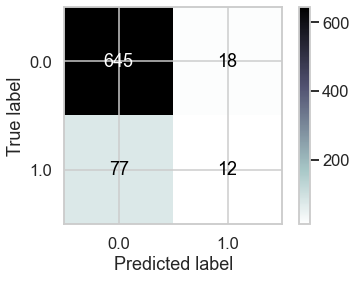

In [23]:
plot_confusion_matrix(base_logmodel, X_test, y_test,cmap='bone_r');

In [24]:
# Compute Receiver operating characteristic (ROC)
# Calculate the probability scores of each point in the training set
y_train_score = base_logmodel.fit(X_train, y_train).decision_function(X_train)

# Calculate the fpr, tpr, and thresholds for the training set
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score)

# Calculate the probability scores of each point in the test set
y_test_score = base_logmodel.decision_function(X_test)

# Calculate the fpr, tpr, and thresholds for the test set
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
# probability that a randomly chosen positive instance is ranked higher 
# than a randomly chosen negative instance
print('Training AUC: {}'.format(round(auc(train_fpr, train_tpr), 5)))
print('Testing AUC: {}'.format(round(auc(test_fpr, test_tpr), 5)))

Training AUC: 0.82014
Testing AUC: 0.71846


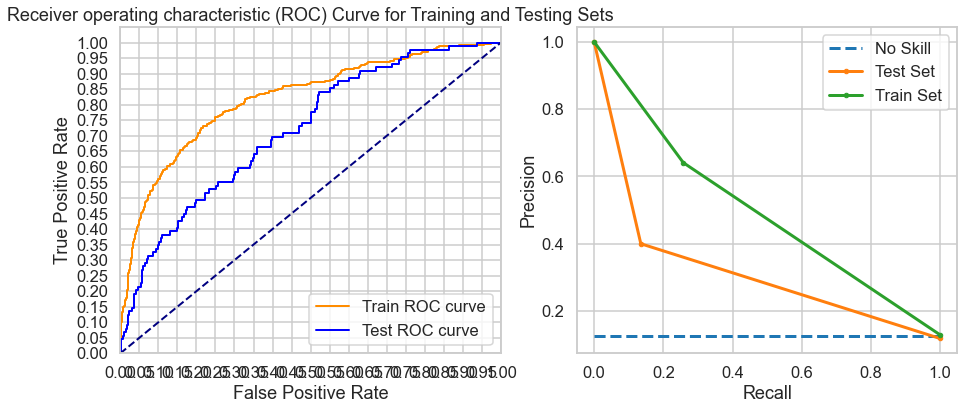

In [25]:
# ROC curve for training set
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
lw = 2
plt.plot(train_fpr, train_tpr, color='darkorange',
             lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='blue',
             lw=lw, label='Test ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training and Testing Sets')
plt.legend(loc='lower right')


plt.subplot(1, 2, 2)
lw =3
no_skill = len(y[y==1]) / len(y)
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', lw = lw, label='No Skill')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_hat_test)
train_precision, train_recall, _ = precision_recall_curve(y_train, y_hat_train)
# plot the model precision-recall curve
plt.plot(recall, precision, marker='.', lw = lw, label='Test Set')
plt.plot(train_recall,train_precision, marker='.',lw=lw, label='Train Set')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()

# show the plot
plt.show()

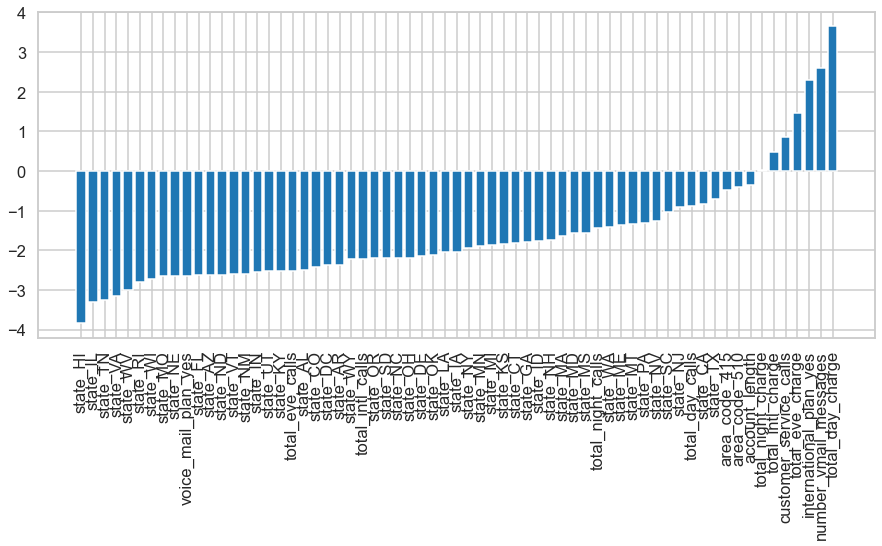

In [26]:
weights_LogReg = pd.Series(base_logmodel.coef_[0], index=X.columns.values)
weights_LogReg.sort_values(inplace=True)
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
features=plt.bar(weights_LogReg.index,weights_LogReg.values)

### SMOTE

In [27]:
smote = SMOTE()
# adasyn = ADASYN()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts())

-----------------------------------------
Synthetic sample class distribution: 

1.0    1962
0.0    1962
Name: churn, dtype: int64


In [28]:
smote_logmodel = LogisticRegression(fit_intercept=False, C=1e12,
                         solver='liblinear', class_weight='balanced')
smote_logmodel.fit(X_train_resampled, y_train_resampled)

#predictions
y_hat_train = smote_logmodel.predict(X_train_resampled)
y_hat_test = smote_logmodel.predict(X_test)

evaluate_predictions(X_train_resampled, X_test, y_train_resampled, y_test, y_hat_train, y_hat_test)

----------------------------------------
Accuracy score for Training Dataset =  0.7938328236493374
Accuracy score for Testing Dataset =  0.7539893617021277
----------------------------------------
------------Confusion Matrix------------
Train set:
[[1552  410]
 [ 399 1563]] 

Test set:
[[518 145]
 [ 40  49]] 

----------------------------------------
---------Classification Matrix:---------
Train set:
              precision    recall  f1-score   support

         0.0       0.80      0.79      0.79      1962
         1.0       0.79      0.80      0.79      1962

    accuracy                           0.79      3924
   macro avg       0.79      0.79      0.79      3924
weighted avg       0.79      0.79      0.79      3924
 

Test set:
              precision    recall  f1-score   support

         0.0       0.93      0.78      0.85       663
         1.0       0.25      0.55      0.35        89

    accuracy                           0.75       752
   macro avg       0.59      0.67    

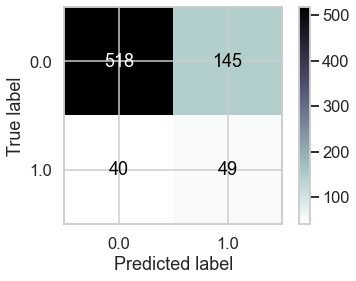

In [29]:
plot_confusion_matrix(smote_logmodel, X_test, y_test,cmap='bone_r');

In [30]:
# Compute Receiver operating characteristic (ROC)
# Calculate the probability scores of each point in the training set
y_train_score = smote_logmodel.fit(X_train, y_train).decision_function(X_train)

# Calculate the fpr, tpr, and thresholds for the training set
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score)

# Calculate the probability scores of each point in the test set
y_test_score = smote_logmodel.decision_function(X_test)

# Calculate the fpr, tpr, and thresholds for the test set
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
# probability that a randomly chosen positive instance is ranked higher 
# than a randomly chosen negative instance
print('Training AUC: {}'.format(round(auc(train_fpr, train_tpr), 5)))
print('Testing AUC: {}'.format(round(auc(test_fpr, test_tpr), 5)))

Training AUC: 0.84208
Testing AUC: 0.74354


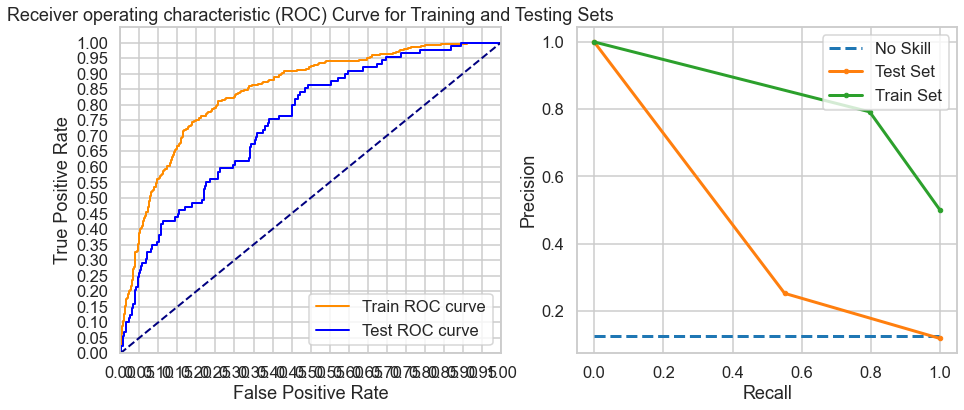

In [31]:
# ROC curve for training set
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
lw = 2
plt.plot(train_fpr, train_tpr, color='darkorange',
             lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='blue',
             lw=lw, label='Test ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training and Testing Sets')
plt.legend(loc='lower right')


plt.subplot(1, 2, 2)
lw =3
no_skill = len(y[y==1]) / len(y)
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', lw = lw, label='No Skill')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_hat_test)
train_precision, train_recall, _ = precision_recall_curve(y_train_resampled, y_hat_train)
# plot the model precision-recall curve
plt.plot(recall, precision, marker='.', lw = lw, label='Test Set')
plt.plot(train_recall,train_precision, marker='.',lw=lw, label='Train Set')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()

# show the plot
plt.show()

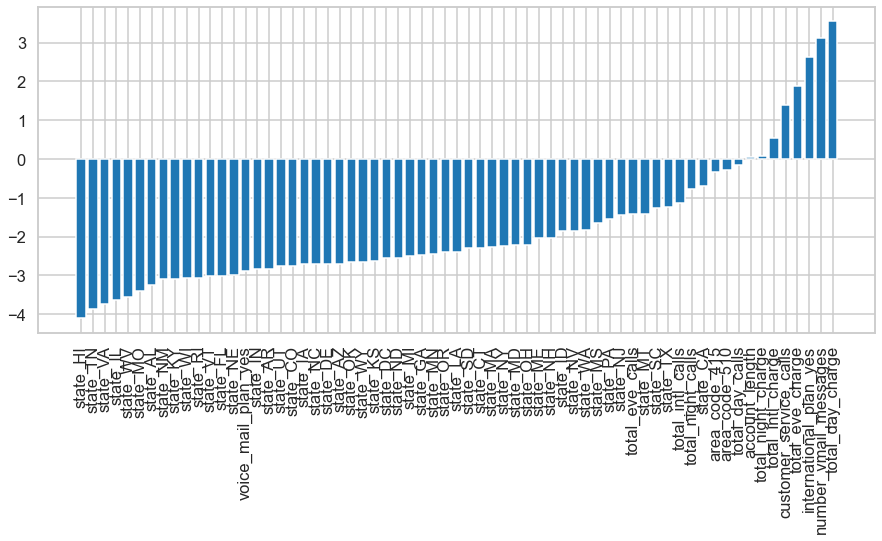

In [32]:
# To get the weights of all the variables
weights_model = pd.Series(smote_logmodel.coef_[0], index=X.columns.values)
weights_model.sort_values(inplace=True)
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
features = plt.bar(weights_model.index, weights_model.values)

In [33]:
#Grid search for Logistic regression 
lr = LogisticRegression()
param_grid = {"C":[0.001, 0.01, 0.1, 1, 10, 100], "penalty":['l1', 'l2', 'none'],
        'class_weight': ['balanced', None], "solver" : ['liblinear', 'saga'],
        "random_state":[10,15, None]}

grid_clf = GridSearchCV(lr, param_grid, cv=3)
grid_clf.fit(X_train, y_train)

print(grid_clf.best_params_)
print(grid_clf.best_score_)

{'C': 0.001, 'class_weight': None, 'penalty': 'none', 'random_state': 10, 'solver': 'saga'}
0.8868175765645806


In [34]:
'''
{'C': 0.001,
 'class_weight': None,
 'penalty': 'none',
 'random_state': 10,
 'solver': 'saga'}
'''

grid_logmodel = LogisticRegression(C=0.001, penalty='none', random_state=10,
                         solver='saga', class_weight='none')
grid_logmodel.fit(X_train, y_train)

#Predictions
y_hat_train = grid_logmodel.predict(X_train)
y_hat_test = grid_logmodel.predict(X_test)

evaluate_predictions(X_train, X_test, y_train, y_test, y_hat_train, y_hat_test)

----------------------------------------
Accuracy score for Training Dataset =  0.8956946293830448
Accuracy score for Testing Dataset =  0.8816489361702128
----------------------------------------
------------Confusion Matrix------------
Train set:
[[1920   42]
 [ 193   98]] 

Test set:
[[641  22]
 [ 67  22]] 

----------------------------------------
---------Classification Matrix:---------
Train set:
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94      1962
         1.0       0.70      0.34      0.45       291

    accuracy                           0.90      2253
   macro avg       0.80      0.66      0.70      2253
weighted avg       0.88      0.90      0.88      2253
 

Test set:
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94       663
         1.0       0.50      0.25      0.33        89

    accuracy                           0.88       752
   macro avg       0.70      0.61    

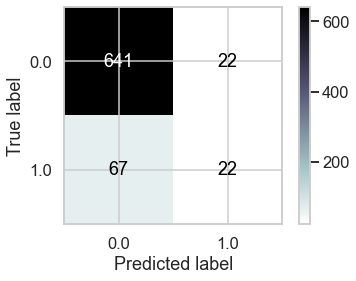

In [35]:
plot_confusion_matrix(grid_logmodel, X_test, y_test,cmap='bone_r');

In [36]:
# Compute Receiver operating characteristic (ROC)
# Calculate the probability scores of each point in the training set
y_train_score = grid_logmodel.fit(X_train, y_train).decision_function(X_train)

# Calculate the fpr, tpr, and thresholds for the training set
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score)

# Calculate the probability scores of each point in the test set
y_test_score = grid_logmodel.decision_function(X_test)

# Calculate the fpr, tpr, and thresholds for the test set
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
# probability that a randomly chosen positive instance is ranked higher 
# than a randomly chosen negative instance
print('Training AUC: {}'.format(round(auc(train_fpr, train_tpr), 5)))
print('Testing AUC: {}'.format(round(auc(test_fpr, test_tpr), 5)))

Training AUC: 0.85018
Testing AUC: 0.76459


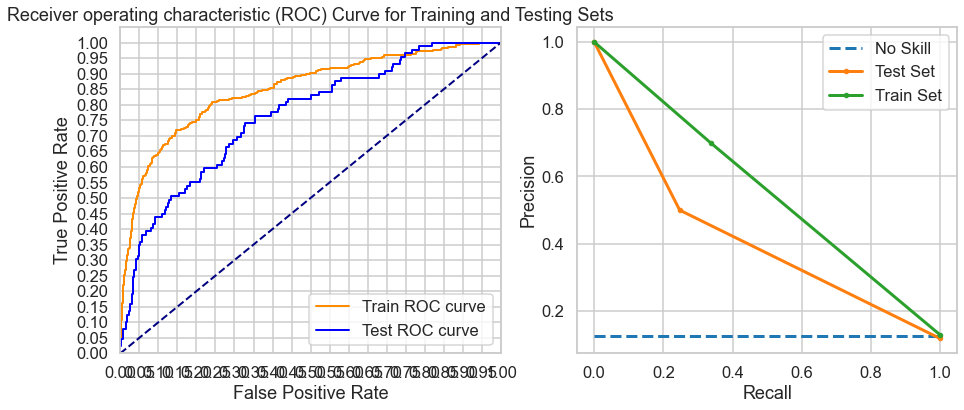

In [37]:
# ROC curve for training set
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
lw = 2
plt.plot(train_fpr, train_tpr, color='darkorange',
             lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='blue',
             lw=lw, label='Test ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training and Testing Sets')
plt.legend(loc='lower right')


plt.subplot(1, 2, 2)
lw =3
no_skill = len(y[y==1]) / len(y)
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', lw = lw, label='No Skill')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_hat_test)
train_precision, train_recall, _ = precision_recall_curve(y_train, y_hat_train)
# plot the model precision-recall curve
plt.plot(recall, precision, marker='.', lw = lw, label='Test Set')
plt.plot(train_recall,train_precision, marker='.',lw=lw, label='Train Set')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()

# show the plot
plt.show()

### Decision Tree

In [38]:
# modeling with Decision Tree
#create an instance and fit the model 
treemodel = DecisionTreeClassifier(random_state=10)
treemodel.fit(X_train, y_train)

#predictions
y_hat_train= treemodel.predict(X_train)
y_hat_test = treemodel.predict(X_test)

evaluate_predictions(X_train, X_test, y_train, y_test, y_hat_train, y_hat_test)

----------------------------------------
Accuracy score for Training Dataset =  1.0
Accuracy score for Testing Dataset =  0.9281914893617021
----------------------------------------
------------Confusion Matrix------------
Train set:
[[1962    0]
 [   0  291]] 

Test set:
[[639  24]
 [ 30  59]] 

----------------------------------------
---------Classification Matrix:---------
Train set:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1962
         1.0       1.00      1.00      1.00       291

    accuracy                           1.00      2253
   macro avg       1.00      1.00      1.00      2253
weighted avg       1.00      1.00      1.00      2253
 

Test set:
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       663
         1.0       0.71      0.66      0.69        89

    accuracy                           0.93       752
   macro avg       0.83      0.81      0.82       75

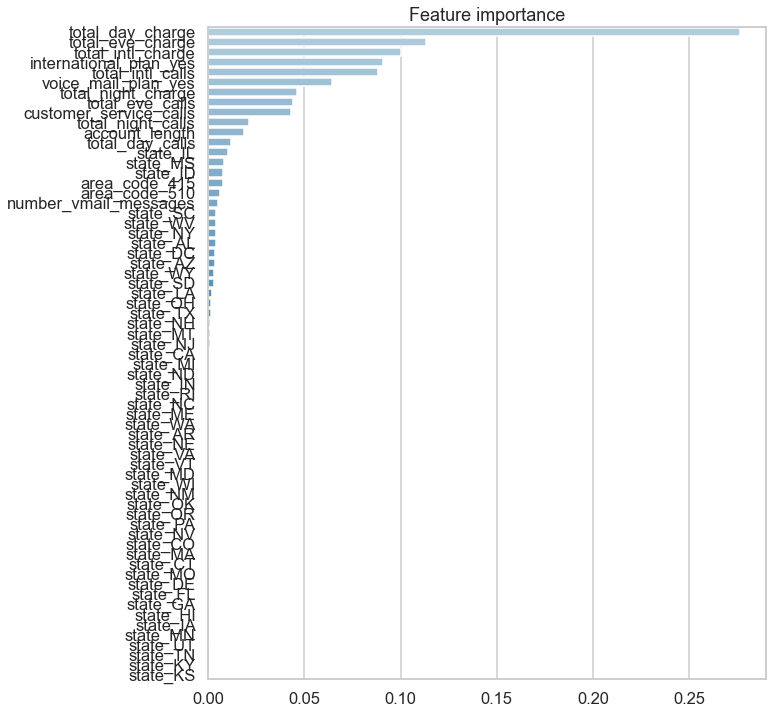

In [39]:
# Plot features importances
imp = pd.Series(data=treemodel.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

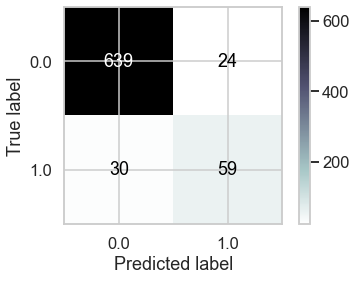

In [40]:
plot_confusion_matrix(treemodel, X_test, y_test,cmap='bone_r');

### Random Forest

In [41]:
randommodel = RandomForestClassifier(n_estimators=100, max_depth= 5)
randommodel.fit(X_train, y_train)

#predictions
y_hat_train = randommodel.predict(X_train)
y_hat_test = randommodel.predict(X_test)

evaluate_predictions(X_train, X_test, y_train, y_test, y_hat_train, y_hat_test)

----------------------------------------
Accuracy score for Training Dataset =  0.8743897026187306
Accuracy score for Testing Dataset =  0.8829787234042553
----------------------------------------
------------Confusion Matrix------------
Train set:
[[1962    0]
 [ 283    8]] 

Test set:
[[663   0]
 [ 88   1]] 

----------------------------------------
---------Classification Matrix:---------
Train set:
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93      1962
         1.0       1.00      0.03      0.05       291

    accuracy                           0.87      2253
   macro avg       0.94      0.51      0.49      2253
weighted avg       0.89      0.87      0.82      2253
 

Test set:
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94       663
         1.0       1.00      0.01      0.02        89

    accuracy                           0.88       752
   macro avg       0.94      0.51    

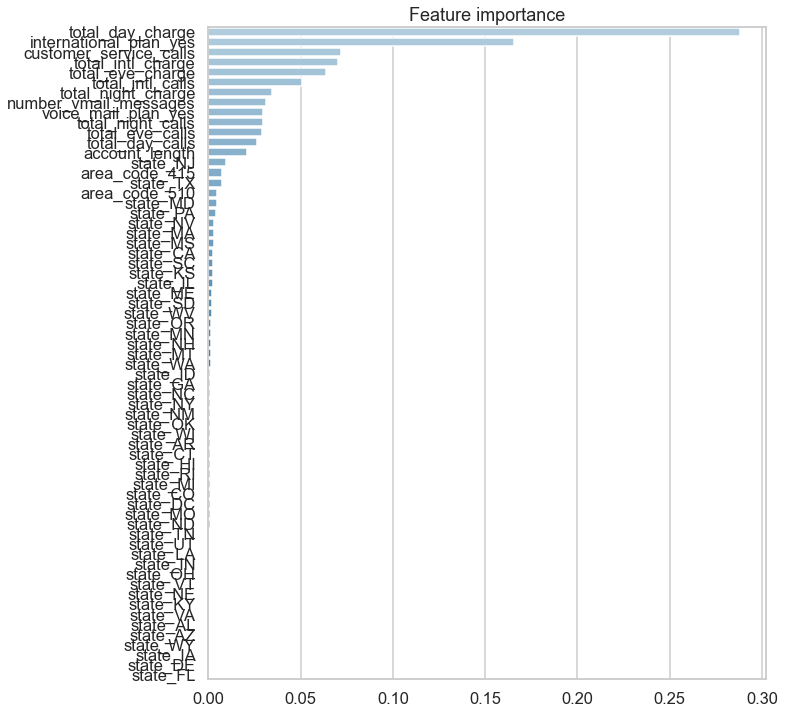

In [42]:
# Plot features importances
imp = pd.Series(data=randommodel.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

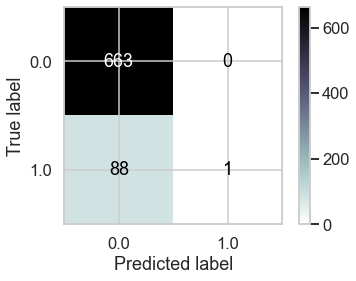

In [43]:
plot_confusion_matrix(randommodel, X_test, y_test,cmap='bone_r');